<a href="https://colab.research.google.com/github/manjeetsrivastava/play-store-app-reveiw-analysis/blob/main/Copy_of_main_google_play_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mp
                            


In [157]:
# load google app review data into dataframe
df = pd.read_csv("/content/Play Store Data.csv")
dfr = pd.read_csv("/content/User Reviews.csv")


In [9]:
# df.head() will provide us with first five recods of the given data i.e,index(0-4)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# df.tail() provide us five records data from end 
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
# Quick information about the google app review data about non null count and data type in column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
# it gives data about count, mean  
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
# look for the random 10 records
df.sample(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3585,Learning English for children,PARENTING,NaN,67,15M,"50,000+",Free,0,Everyone,Parenting;Education,"April 18, 2018",1.9,2.3 and up
3111,Hotels.com: Book Hotel Rooms & Find Vacation D...,TRAVEL_AND_LOCAL,4.5,260121,Varies with device,"10,000,000+",Free,0,Everyone,Travel & Local,"July 4, 2018",Varies with device,Varies with device
7110,Viking CB Radios,BUSINESS,4.3,6,15M,"1,000+",Free,0,Everyone,Business,"May 24, 2017",1.0.1,4.1 and up
3208,IHG®: Hotel Deals & Rewards,TRAVEL_AND_LOCAL,4.3,18622,44M,"1,000,000+",Free,0,Everyone,Travel & Local,"August 3, 2018",4.15.1,4.4 and up
949,MTV,ENTERTAINMENT,3.8,35279,15M,"1,000,000+",Free,0,Teen,Entertainment,"July 8, 2018",11.45.0,4.4 and up
4787,X-ray scanner simulator,FAMILY,2.7,1616,3.0M,"500,000+",Free,0,Everyone,Casual,"January 8, 2017",7.0,2.1 and up
1664,Block Puzzle,GAME,4.6,59800,7.8M,"5,000,000+",Free,0,Everyone,Puzzle,"March 6, 2018",2.9,2.3 and up
6907,BW Mobilbanking für Smartphone und Tablet,FINANCE,4.1,2048,24M,"100,000+",Free,0,Everyone,Finance,"July 10, 2018",4.2.0,4.4 and up
7385,CI Dictionary,FAMILY,4.6,31,3.2M,"1,000+",Free,0,Everyone,Education,"September 1, 2015",1.0,4.0.3 and up
5116,AG EMS Tour,FAMILY,NaN,3,62M,500+,Free,0,Everyone,Entertainment,"May 5, 2017",1.35,4.0 and up


In [14]:
# for finding what are the types of Category
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
# this gives us about the type of apps available on google apps 
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [16]:
# for finding the  type of content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [17]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [18]:
df['Rating'].mode()


0    4.4
dtype: float64

In [19]:
df['Rating'].median()

4.3

In [20]:

# data cleaning of size columm

val = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=val)


sizes = [i for i in df['Size']]

cleaned_data=[]
def fix_size(sizes_list):
 for size in sizes_list:

    if 'M' in size:

      size=size.replace('M','')
      size = float(size)

    elif 'k' in size:
      size=size.replace('k','')
      size = float(size)
      size = size/1024



    elif  'Varies with device' in size:
      size=float(0) 

    cleaned_data.append(size)  
 return cleaned_data
df['Size'] = fix_size(sizes)
df['Size'] = df['Size'].astype(float)
       



In [21]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [22]:
# Review data cleaning
rev= [i for i in df['Reviews']]

def fix_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for rev in reviews_list:
        if 'M' in rev:
            rev = rev.replace('M', '')
            rev = float(rev) * 1000000  # 1M = 1,000,000
        cleaned_data.append(rev)
    return cleaned_data

df['Reviews'] = fix_reviews(rev)
df['Reviews'] = df['Reviews'].astype(float)


In [23]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [24]:
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [25]:
# cleaning of price
price = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(price)
df['Price'] = df['Price'].astype(float)


In [26]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4198,AntennaPict β,COMMUNICATION,4.3,15439.0,2.2,"1,000,000+",Free,0.0,Everyone,Communication,"November 7, 2016",2.0.0,2.3 and up
9564,Real Madrid App,SPORTS,4.6,161423.0,73.0,"5,000,000+",Free,0.0,Everyone,Sports,"August 1, 2018",6.5.3,5.0 and up
10078,EY Team Connect,PRODUCTIVITY,NaN,0.0,38.0,50+,Free,0.0,Everyone,Productivity,"June 8, 2018",1.20180531.3,5.0 and up
1180,Sumine side dish - dish recipe side dish,FOOD_AND_DRINK,NaN,82.0,4.9,"10,000+",Free,0.0,Everyone,Food & Drink,"June 23, 2018",1.1,4.1 and up
8292,Your Freedom VPN Client,COMMUNICATION,4.0,74497.0,5.3,"5,000,000+",Free,0.0,Everyone,Communication,"May 19, 2018",20180518-01,4.0 and up
3226,Scout GPS Navigation & Meet Up,TRAVEL_AND_LOCAL,4.2,120373.0,31.0,"5,000,000+",Free,0.0,Everyone,Travel & Local,"July 31, 2018",3.19.35.999,4.0.3 and up
8781,Dr. Pixel: Pill mania Classic,FAMILY,4.3,2419.0,6.2,"100,000+",Free,0.0,Everyone,Puzzle,"March 31, 2018",1.2.7,4.0 and up
7478,CK Employee Portal,BUSINESS,5.0,7.0,15.0,"1,000+",Free,0.0,Everyone,Business,"January 5, 2017",1.0.1,4.1 and up
656,Titanic App - Feminist Dating Application,DATING,4.5,120.0,10.0,500+,Free,0.0,Mature 17+,Dating,"August 4, 2018",1.5-beta,5.0 and up
9757,ER Neck Surgery: Hospital Christmas Emergency,FAMILY,NaN,11.0,30.0,"5,000+",Free,0.0,Everyone 10+,Role Playing,"November 24, 2017",1.0.1,4.1 and up


In [27]:
#cleaning of Install data 

installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [28]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
total1=  df.groupby("Category")['Type'].agg("count").reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


CLEANING OF DATASETS


In [29]:
# Remove the record where "Type" is null:
index= df[df['Type'].isna()].index

df.drop(axis = 0, inplace = True,index=index)


In [30]:
# REMOVE THE RECORD WHERE "TYPE" IS "O" BY USING DROP FUNCTION
for x in df.index:
  if df.loc[x, "Type"] == "0":
    df.drop(x, inplace = True)

  

In [31]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [32]:
# check for null values , isna() detects missing values and return boolean values
df.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [33]:
df["Rating"].fillna(4.1,inplace = True)


In [ ]:
#df.drop(axis =0,index =10472 ,inplace=True)

In [34]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [35]:
df.dropna(subset = ['Content Rating'], inplace = True)

In [36]:
print(df['Content Rating'].agg('count'))

10839


In [37]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


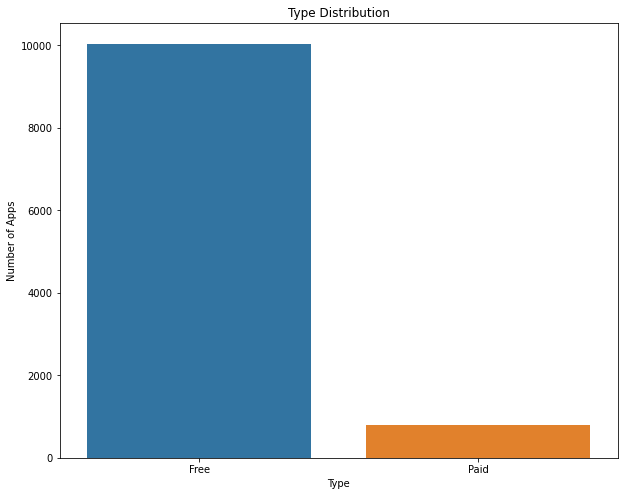

In [ ]:
# application type distribution
plt.figure(figsize=(10, 8))
sns.countplot(df['Type'])

plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

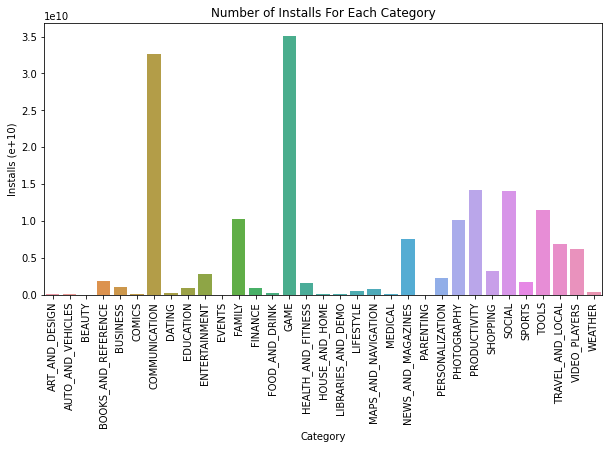

In [ ]:
# get the number of installs for each category
categories = df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index () # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

In [ ]:

df2 = pd.DataFrame().assign(Category=df['Category'], Type = df['Type'],Installs=df['Installs'])
print(df2)

                  Category  Type    Installs
0           ART_AND_DESIGN  Free     10000.0
1           ART_AND_DESIGN  Free    500000.0
2           ART_AND_DESIGN  Free   5000000.0
3           ART_AND_DESIGN  Free  50000000.0
4           ART_AND_DESIGN  Free    100000.0
...                    ...   ...         ...
10836               FAMILY  Free      5000.0
10837               FAMILY  Free       100.0
10838              MEDICAL  Free      1000.0
10839  BOOKS_AND_REFERENCE  Free      1000.0
10840            LIFESTYLE  Free  10000000.0

[10839 rows x 3 columns]


In [ ]:
total1=  df.groupby("Category")['Type' ].count().reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


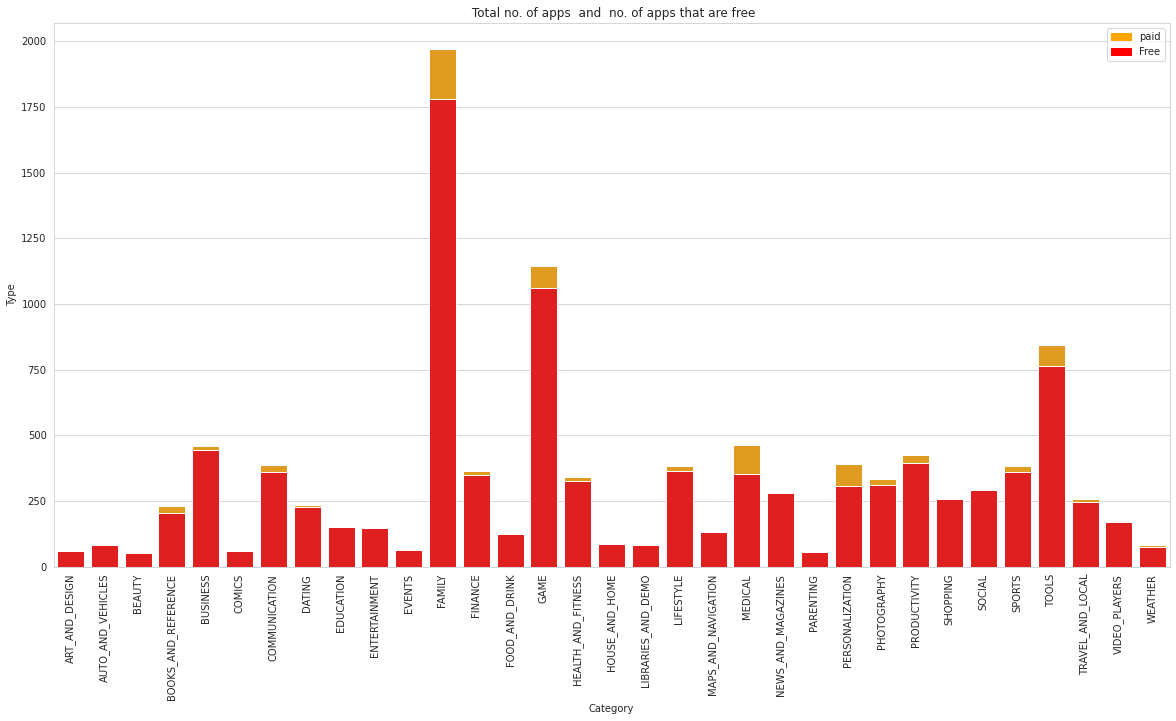

In [ ]:
sns.set_style("whitegrid")
total=  df.groupby("Category")['Type'].count().reset_index()
plt.figure(figsize = (20,10))
plt.xticks(rotation =90)

# plot chart for the total apps
sns.set_color_codes('pastel')
c1 = sns.barplot(x = "Category", y = "Type",data = total,color = 'orange')

# create a new data frame for paid 

free_apps = df[df.Type == 'Free']
free = free_apps.groupby('Category').count().reset_index()

# bargraph for free apss
c2 = sns.barplot(x = "Category", y = "Type",data = free,color = 'red')
plt.title(" Total no. of apps  and  no. of apps that are free")

#ADD LEGEND
top = mp.Patch(color = "orange", label = "paid")
bot = mp.Patch(color = "red" , label = "Free")
plt.legend(handles = [top, bot])



In [ ]:
free_apps = df[df.Type == 'Free']
free =free_apps.groupby('Category').count()['App'].sort_values(ascending = False)


Category
FAMILY                 1780
GAME                   1061
TOOLS                   765
BUSINESS                446
PRODUCTIVITY            396
LIFESTYLE               363
SPORTS                  360
COMMUNICATION           360
MEDICAL                 354
FINANCE                 349
HEALTH_AND_FITNESS      325
PHOTOGRAPHY             313
PERSONALIZATION         309
SOCIAL                  292
NEWS_AND_MAGAZINES      281
SHOPPING                258
TRAVEL_AND_LOCAL        246
DATING                  227
BOOKS_AND_REFERENCE     203
VIDEO_PLAYERS           171
EDUCATION               152
ENTERTAINMENT           147
MAPS_AND_NAVIGATION     132
FOOD_AND_DRINK          125
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        82
WEATHER                  74
EVENTS                   63
ART_AND_DESIGN           62
COMICS                   60
PARENTING                58
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
df4 = pd.DataFrame().assign(Rating=df['Rating'],Installs=df['Installs'])
print(df4)

       Rating    Installs
0         4.1     10000.0
1         3.9    500000.0
2         4.7   5000000.0
3         4.5  50000000.0
4         4.3    100000.0
...       ...         ...
10836     4.5      5000.0
10837     5.0       100.0
10838     4.1      1000.0
10839     4.5      1000.0
10840     4.5  10000000.0

[10839 rows x 2 columns]


**5**. **TOTAL NUMBER OF APPLICATIONS IN EACH CATEGORY**

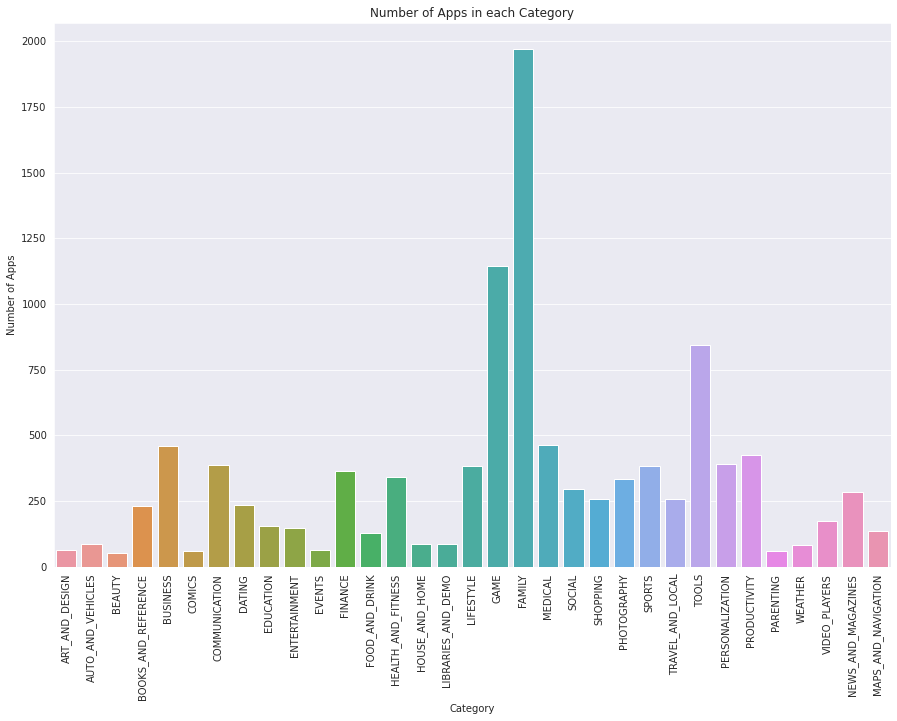

In [ ]:

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps in each Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [ ]:
# CORRELATION BETWEEN RATING AND INSTALL
print(df['Rating'].corr(df['Installs']))
print(df['Rating'].corr(df['Size']))
print(df['Rating'].corr(df['Price']))


0.055835348745672066
0.04998834029825421
-0.020835442499074625


In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.071814,0.049988,0.055835,-0.020835
Reviews,0.071814,1.000000,0.065450,0.643121,-0.009668
Size,0.049988,0.065450,1.000000,-0.003468,-0.013464
Installs,0.055835,0.643121,-0.003468,1.000000,-0.011691
Price,-0.020835,-0.009668,-0.013464,-0.011691,1.000000


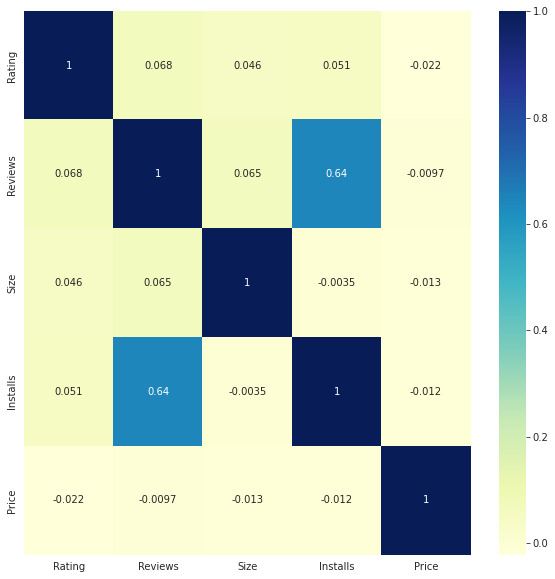

In [ ]:
plt.figure(figsize = (10,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
dfy=df.groupby(['Category'])['Rating'].mean()
dfy

Category
ART_AND_DESIGN         4.346154
AUTO_AND_VEHICLES      4.177647
BEAUTY                 4.241509
BOOKS_AND_REFERENCE    4.289610
BUSINESS               4.114130
COMICS                 4.153333
COMMUNICATION          4.149612
DATING                 3.992308
EDUCATION              4.387179
ENTERTAINMENT          4.126174
EVENTS                 4.335938
FAMILY                 4.181786
FINANCE                4.128142
FOOD_AND_DRINK         4.157480
GAME                   4.278671
HEALTH_AND_FITNESS     4.254252
HOUSE_AND_HOME         4.184091
LIBRARIES_AND_DEMO     4.160000
LIFESTYLE              4.095812
MAPS_AND_NAVIGATION    4.056204
MEDICAL                4.167387
NEWS_AND_MAGAZINES     4.126502
PARENTING              4.266667
PERSONALIZATION        4.289031
PHOTOGRAPHY            4.187164
PRODUCTIVITY           4.192217
SHOPPING               4.246154
SOCIAL                 4.236610
SPORTS                 4.202604
TOOLS                  4.054211
TRAVEL_AND_LOCAL       4.108140

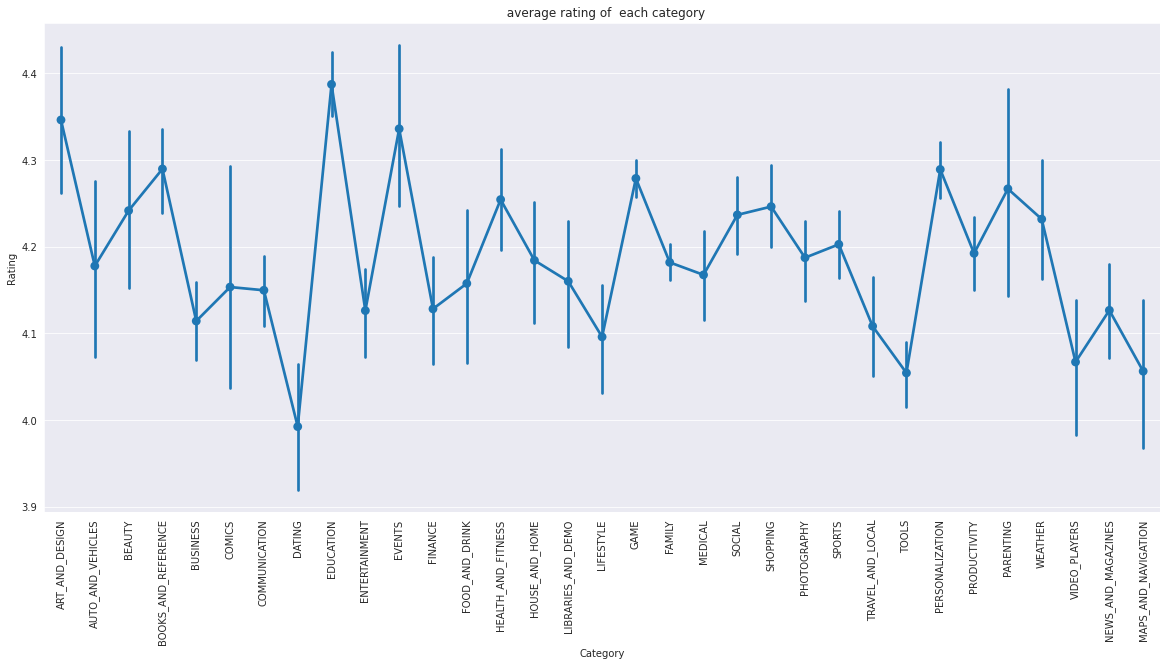

In [ ]:
# plot point plot for average rating of each category

plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
plt.title("  average rating of  each category")
sns.pointplot(x = "Category", y = "Rating", data = df)

In [ ]:




dft = df['Content Rating'].value_counts()
dft


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Rating')

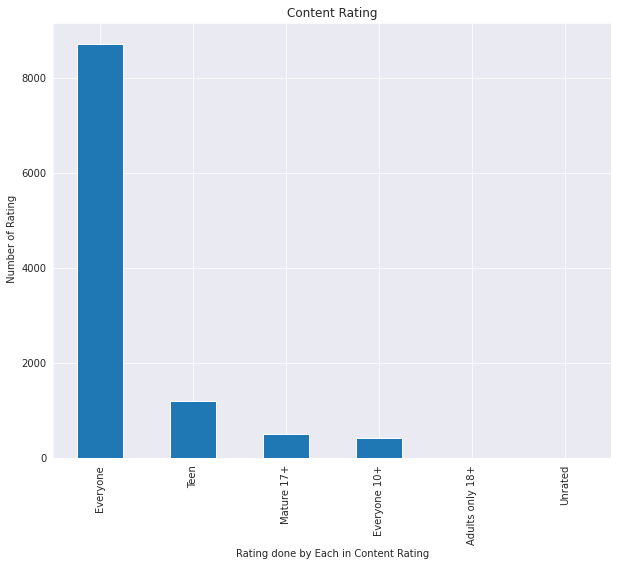

In [ ]:
# plot bargraph for  content raing

plt.figure(figsize = (10,8))
dft.plot(kind="bar")
plt.ylabel(" Number of Rating")
plt.xlabel("Rating done by Each in Content Rating")
plt.title("Content Rating")

In [ ]:
dfr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
dfr['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
#removal of null values in sentiment column
dfr.dropna(subset = ['Sentiment'], inplace = True)

In [ ]:
dfr["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
dfr1 = dfr['Sentiment'].value_counts()
dfr1

Positive    16432
Negative     5697
Neutral      3483
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


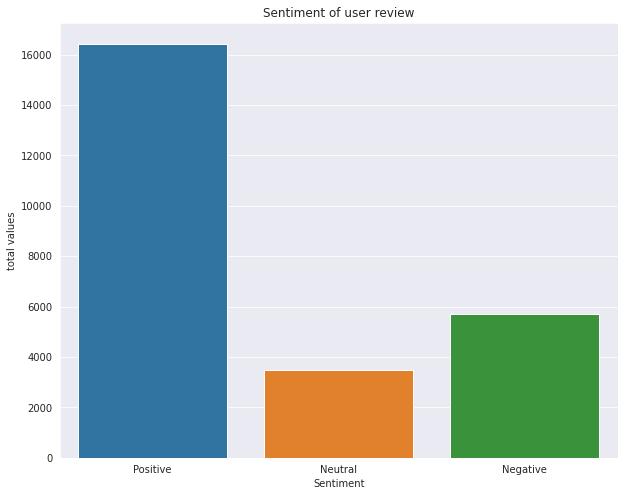

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(dfr['Sentiment'])

plt.title('Sentiment of user review')
plt.ylabel('total values')
plt.show()

In [40]:
Paid_df= df[df['Type'] == 'Paid']

In [41]:
earn_df = df[['App', 'Installs', 'Price']]
earn_df

,App,Installs,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000.0,0.0
1,Coloring book moana,500000.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0,0.0
3,Sketch - Draw & Paint,50000000.0,0.0
4,Pixel Draw - Number Art Coloring Book,100000.0,0.0
...,...,...,...
10836,Sya9a Maroc - FR,5000.0,0.0
10837,Fr. Mike Schmitz Audio Teachings,100.0,0.0
10838,Parkinson Exercices FR,1000.0,0.0
10839,The SCP Foundation DB fr nn5n,1000.0,0.0


In [42]:
earn_df['Earnings'] = earn_df['Installs'] * earn_df['Price'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
earn_df_sort_by_Earnings = earn_df.sort_values(by='Earnings', ascending=False).head(50)

In [57]:
earn_df_sort_by_Price = earn_df_sort_by_Earnings.sort_values(by='Price', ascending=False)

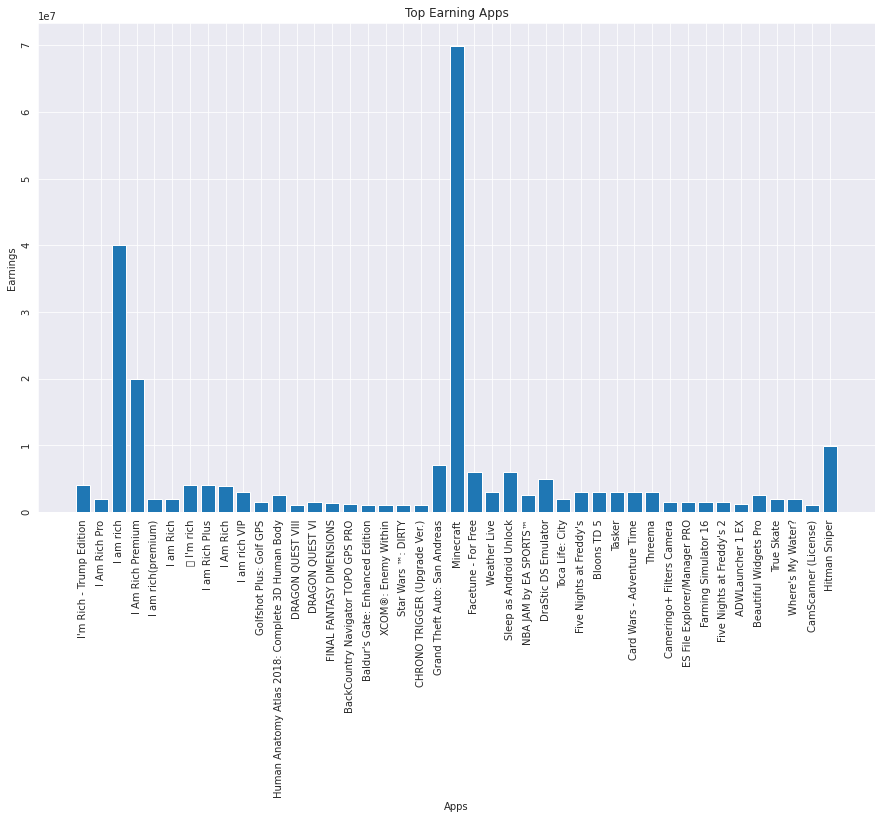

In [58]:
# plot a bar chart for top 5 earning apps
plt.figure(figsize=(15,9))
sns.set_style("darkgrid")
plt.bar(earn_df_sort_by_Price.App, earn_df_sort_by_Price.Earnings, label=earn_df_sort_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

here from the above grpah we can easily see that the top 5 earning apps are:-
1)Minecraft
2)I am rich 
3)I am rich (premium)
4)hitman sniper
5)GTA: sandreas


In [69]:
# Apps with higheer numbe rof reviews

high_rev_apps = df.sort_values(by='Reviews', ascending=False).head(50)

In [70]:
high_rev_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


Text(0.5, 1.0, ' **top apps having higher no. of reviews**')

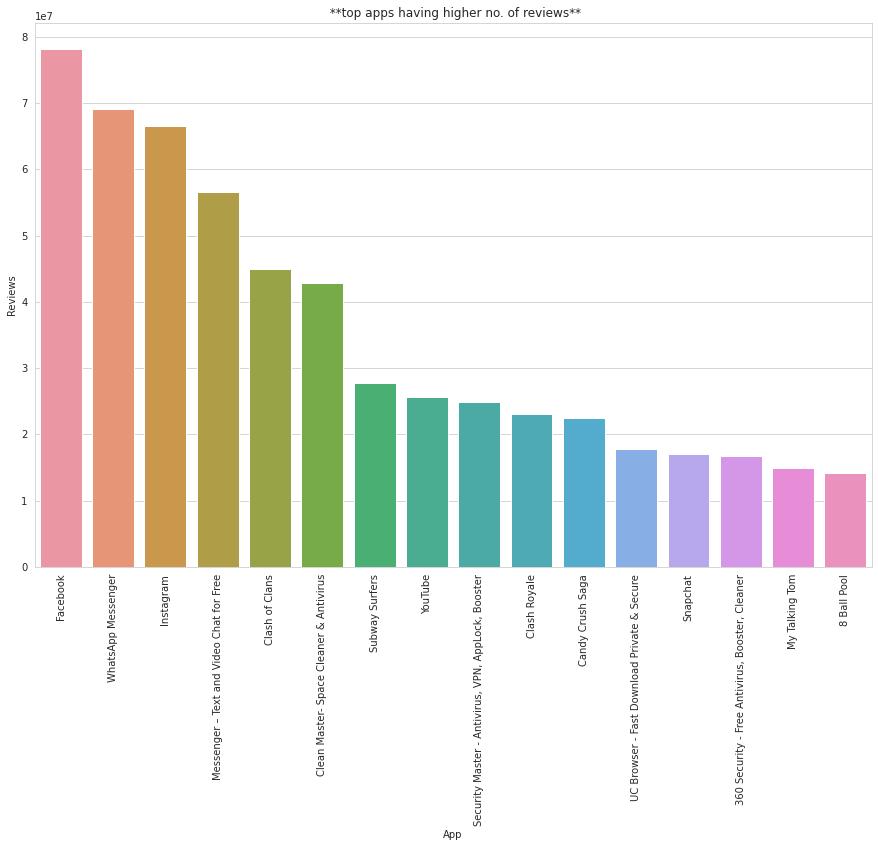

In [72]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt.xticks(rotation = 90)
sns.barplot(x = 'App', y = 'Reviews', data = high_rev_apps)
plt.title(" **top apps having higher no. of reviews**")


In [89]:
# top ten paid apps 
top_10_paid_apps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
top_10_paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300000,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.942383,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000000,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.1,0.0,40.000000,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.700000,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.800000,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.000000,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.700000,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000000,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.700000,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up


In [87]:
top_10_paid_apps = top_10_paid_apps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


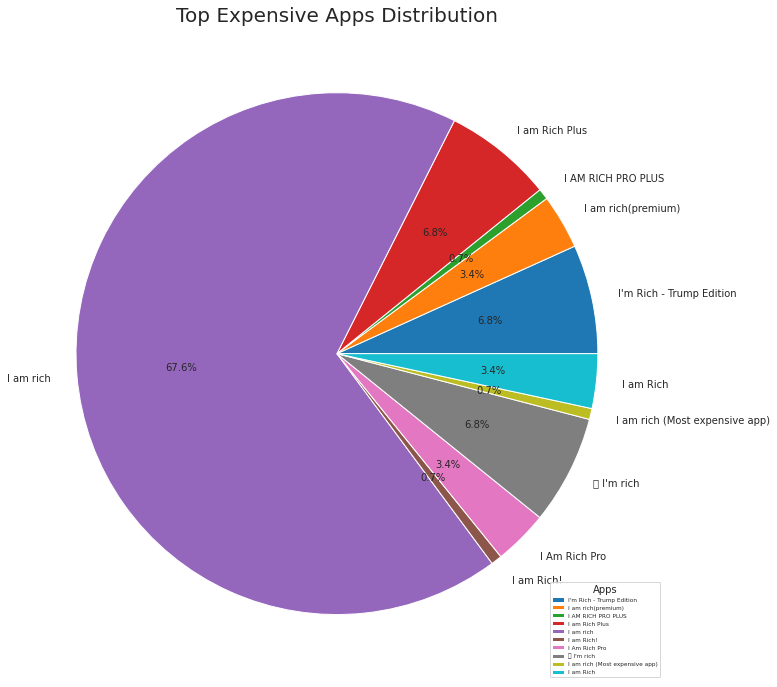

In [88]:
plt.figure(figsize=(15,12));
plt.pie(top_10_paid_apps.Installs, explode=None, labels=top_10_paid_apps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top_10_paid_apps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

In [97]:
# category wise priec:

cat_price = df.groupby('Category')
y=cat_price['Price'].agg(np.sum)
y

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

Text(0, 0.5, 'Price')

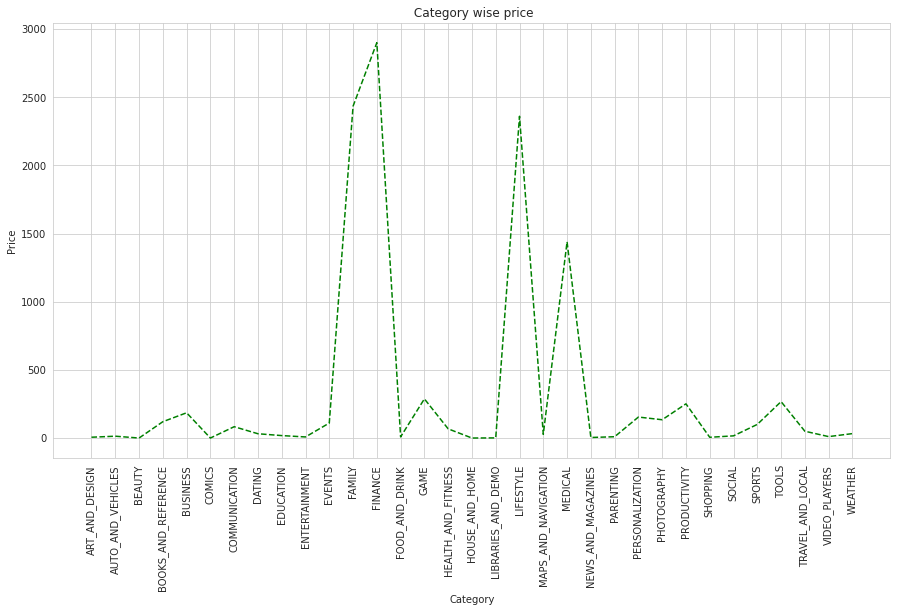

In [99]:
plt.figure(figsize =(15,8))
plt.plot(y,'r--',color = "green")
plt.xticks(rotation = 90)
plt.title(" Category wise price")
plt.xlabel("Category")
plt.ylabel("Price")

from above figure , we see that "finance" Category has high price as compared to others.


In [ ]:
df['Genres'].unique()

In [112]:
df['Genres'].value_counts().head(10)

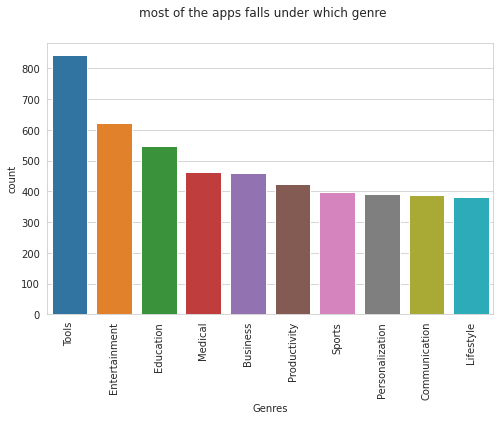

In [118]:
fig,ax1 = plt.subplots(figsize = (8,5))
plt.suptitle("most of the apps falls under which genre")
plt.xticks(rotation = 90)
sns.countplot( x  = "Genres",data = df,ax = ax1, order = df['Genres'].value_counts().head(10).index)
plt.show()

Here from the above example we saw that most of the apps belongs to "Tools" Genres 

In [131]:
dfu = df[ df['Reviews'] > 50000].sort_values(by='Reviews')
dfu

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017.0,41.0,1.000000e+06,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
9677,Masha and The Bear Jam Day Match 3 games for kids,FAMILY,4.6,50060.0,98.0,1.000000e+06,Free,0.0,Everyone,Puzzle;Brain Games,"August 7, 2018",1.4.83,4.1 and up
8294,Bokeh (Background defocus),PHOTOGRAPHY,4.0,50109.0,0.0,1.000000e+07,Free,0.0,Everyone,Photography,"June 7, 2018",Varies with device,Varies with device
3098,Fantasy Football,SPORTS,3.5,50179.0,23.0,1.000000e+06,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
3046,Fantasy Football,SPORTS,3.5,50179.0,23.0,1.000000e+06,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


**what is the average size of the free apps & paid apps**

In [132]:
df.groupby('Type')['Size'].mean()

Type
Free    18.207730
Paid    17.472417
Name: Size, dtype: float64

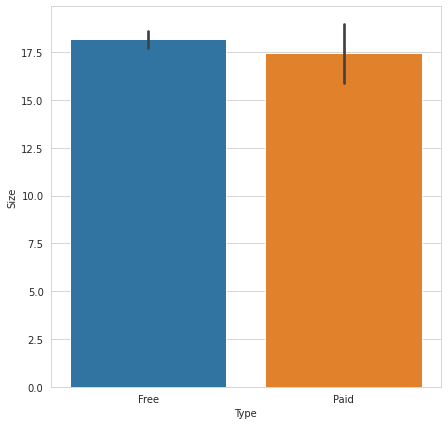

In [134]:
plt.figure(figsize = (7,7))
sns.barplot(x='Type', y='Size', data=df,estimator=np.mean)

# Top 5 App have max Review

In [142]:
index=df['Reviews'].sort_values(ascending=True).head().index
df.iloc[index]['App']

6664               Miller's Bar B-Q
649     Healthy Relationships Guide
6832                     Bu Nedir ?
652                         PlusOne
3705           Video Wallpaper Show
Name: App, dtype: object

# which category getting Highest Avg Rating

In [143]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=True)

Category
DATING                 3.992308
TOOLS                  4.054211
MAPS_AND_NAVIGATION    4.056204
VIDEO_PLAYERS          4.066857
LIFESTYLE              4.095812
TRAVEL_AND_LOCAL       4.108140
BUSINESS               4.114130
ENTERTAINMENT          4.126174
NEWS_AND_MAGAZINES     4.126502
FINANCE                4.128142
COMMUNICATION          4.149612
COMICS                 4.153333
FOOD_AND_DRINK         4.157480
LIBRARIES_AND_DEMO     4.160000
MEDICAL                4.167387
AUTO_AND_VEHICLES      4.177647
FAMILY                 4.181786
HOUSE_AND_HOME         4.184091
PHOTOGRAPHY            4.187164
PRODUCTIVITY           4.192217
SPORTS                 4.202604
WEATHER                4.231707
SOCIAL                 4.236610
BEAUTY                 4.241509
SHOPPING               4.246154
HEALTH_AND_FITNESS     4.254252
PARENTING              4.266667
GAME                   4.278671
PERSONALIZATION        4.289031
BOOKS_AND_REFERENCE    4.289610
EVENTS                 4.335938

# App having rating more than 4

In [144]:
df[df.Rating>4]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.1,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# data Shape

In [145]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,10839.000000,1.083900e+04,10839.000000
mean,4.179288,4.441939e+05,18.153458,1.546577e+07,1.027463
std,0.479960,2.927893e+06,22.171186,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000,3.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


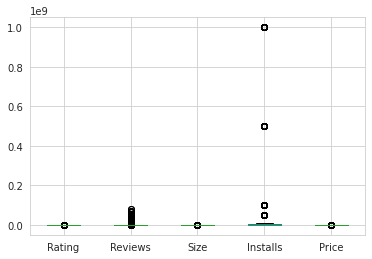

In [146]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd47b94c690>,
      dtype=object)

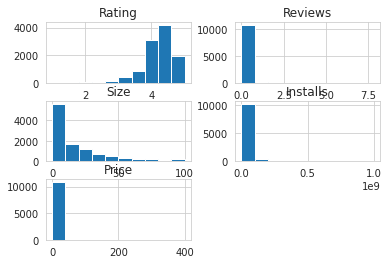

In [147]:
df.hist()

#which App have max Review

In [148]:
df['Reviews'].max()

78158306.0

In [149]:
df[df['Reviews'].max()==df['Reviews']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


# correlation b/w size and nuber of installed app

In [150]:
df.loc[0:10842,['Size','Installs']]

,Size,Installs
0,19.0,10000.0
1,14.0,500000.0
2,8.7,5000000.0
3,25.0,50000000.0
4,2.8,100000.0
...,...,...
10836,53.0,5000.0
10837,3.6,100.0
10838,9.5,1000.0
10839,0.0,1000.0


In [151]:
print(df['Size'].corr(df['Installs']))

-0.00346790732976557


# Year wise App Installation

Text(0.5, 0, 'Last Updated')

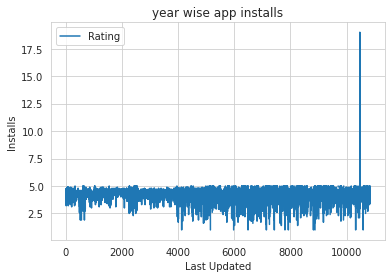

In [158]:
df.plot()

plt.title('year wise app installs')
plt.ylabel('Installs')
plt.xlabel('Last Updated')

# 1. Top 10 apps in any category

In [159]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

TypeError: ignored

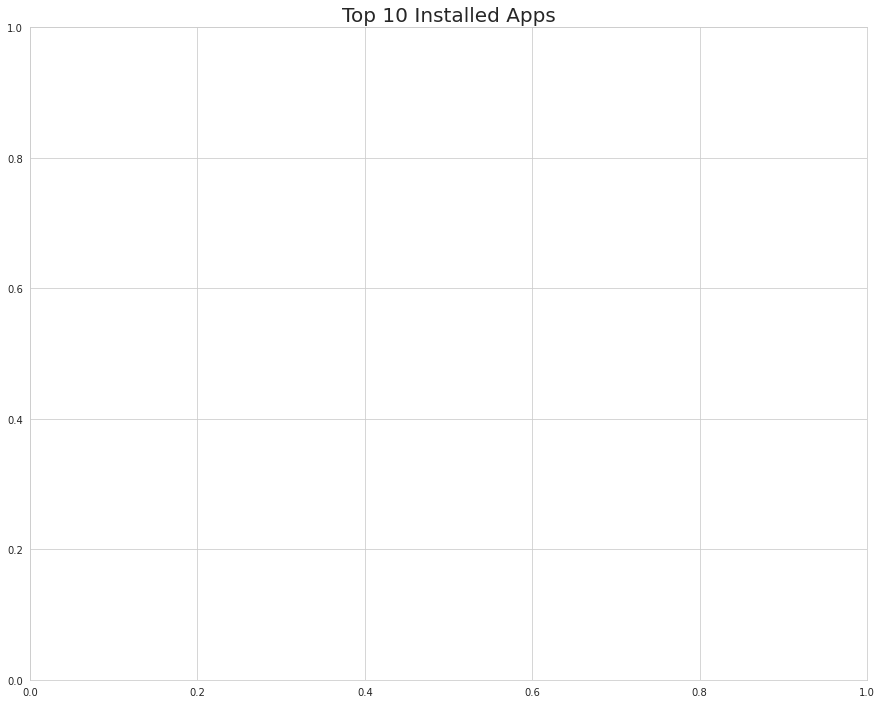

In [160]:
#findtop10incategory('Sports')

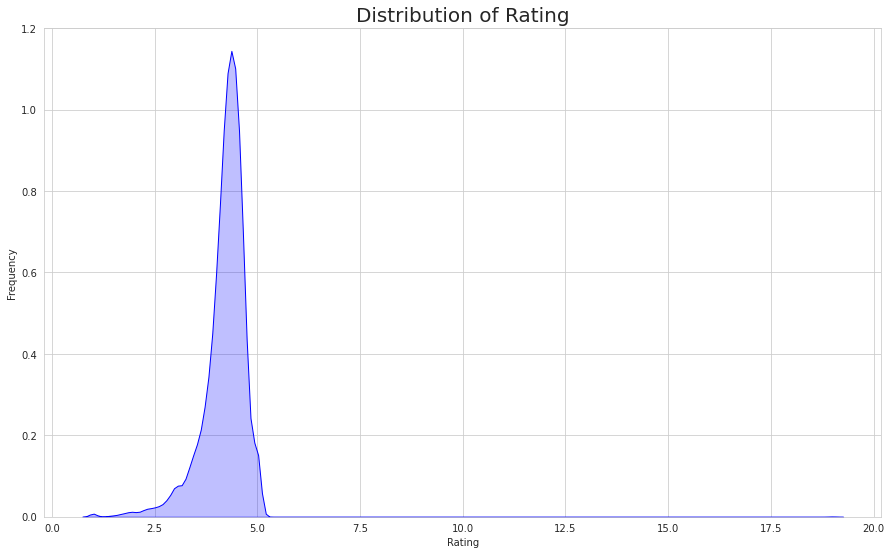

In [161]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

.# Distribution of Installs (Paid and free)

In [166]:
df = df[df['Installs'] != 'Free']

In [165]:
all_free = df[df['Type'] == 'Free']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (free apps)')]

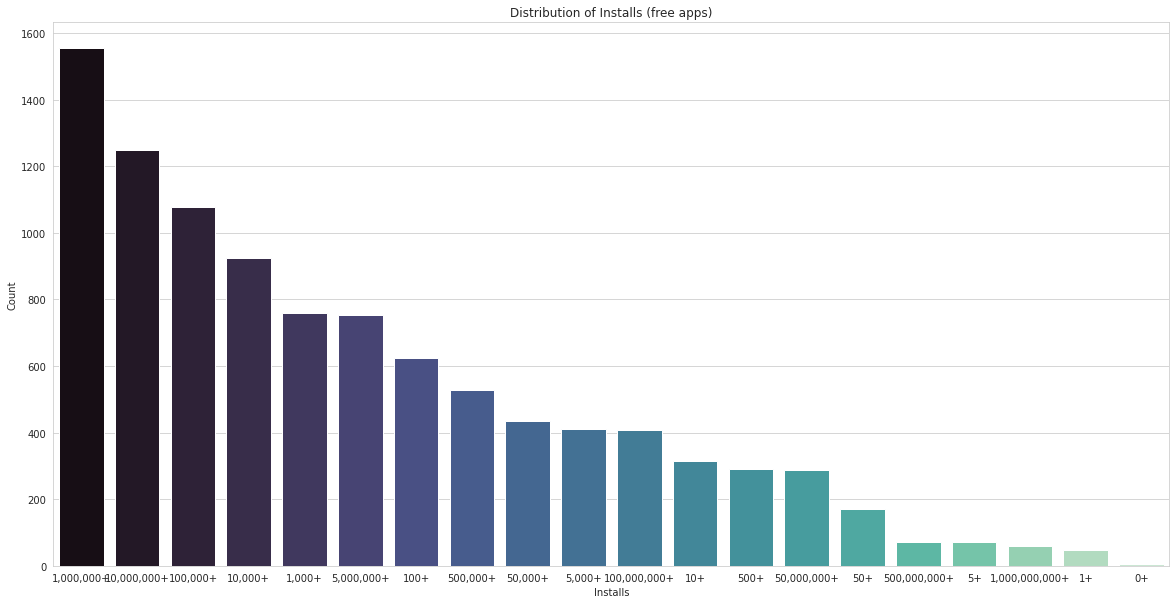

In [167]:
free_counts = pd.DataFrame(all_free['Installs'].value_counts())
plt.figure(figsize=(20, 10))
sns.barplot(x=free_counts.index, y=free_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (free apps)')

In [162]:
all_paid = df[df['Type'] == 'Paid']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (paid apps)')]

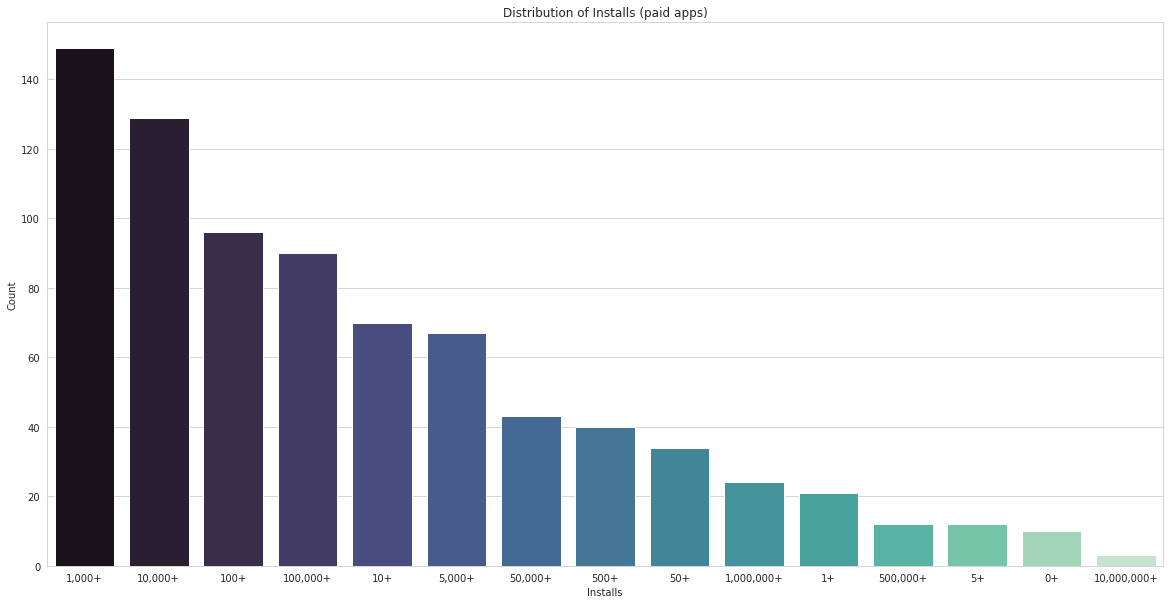

In [163]:
paid_counts = pd.DataFrame(all_paid['Installs'].value_counts())
plt.figure(figsize=(20, 10))
sns.barplot(x=paid_counts.index, y=paid_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (paid apps)')